# Supplemental Figure 1

convert this to use axesgrid

## Caption
Log10 transformed phosphorous flux for each tributary. Color represents river location in the north, east, or west.

In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.size']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['axes.labelsize']=12
rcParams['axes.titlesize']=12

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import AxesGrid
import struct
import sys

# Load data

This is kind of sloppy. But it is not worth my time to fix this
because it does what I wants

In [2]:
### Fields: 
### 0 : filepath
### 1 : latitude of river mouth
### 2 : Longitude of river mouth
### 3 : River name
### 4 : Region (North, South East, or South West)
### 5 : Plotting style
### 6 : Line thickness when plotted

### Colors for each river
N = list(map(lambda x: x/255, [51, 31, 136]))
SE = list(map(lambda x: x/255, [153, 153, 51]))
SW = list(map(lambda x: x/255, [136, 34, 85]))

### Store the data in a dictionary
dir_raw='/Users/gloege/Documents/Projects/MITgcm-Michigan-Phosphorus/data/raw/'
wrtds_dir = f'{dir_raw}/wrtds/' 
stations = {'053210': [wrtds_dir + 'Fox_053210.csv', 44.54, -88.005, 'Fox', N, '-', 2.5],
            '04126010': [wrtds_dir + 'Manistee_04126010.csv', 44.25, -86.34453, 'Manistee', SE, '-', 1],
            '04122030': [wrtds_dir + 'Muskegon_04122030.csv', 43.227089, -86.341987, 'Muskegon', SE, '-', 1],
            '04102080': [wrtds_dir + 'St_Joseph_04102080.csv', 42.114167, -86.488333, 'St Joseph', SE, '-', 1],
            '04119400': [wrtds_dir + 'Grand_04119400.csv', 43.05835, -86.25088, 'Grand', SE, '-', 1],
            '04057004': [wrtds_dir + 'Manistique_04057004.csv', 45.948, -86.246, 'Manistique', N, '-', 1],
            '04122500': [wrtds_dir + 'Pere_Marquette_04122500.csv', 43.951667, -86.460278, 'Pere Marquette', SE, '-', 1],
            '383088': [wrtds_dir + 'Menominee_383088.csv', 45.0947, -87.59121, 'Menominee', N, '-', 1],
            '04108660': [wrtds_dir + 'Kalamazoo_04108660.csv', 42.67669, -86.21531, 'Kalamazoo', SE, '-', 2.5],
            '413640': [wrtds_dir + 'Milwaukee_413640.csv', 43.025556, -87.894831, 'Milwaukee', SW, '-', 1],
            '603095': [wrtds_dir + 'Sheboygan_603095.csv', 43.748976, -87.702149, 'Sheboygan', SW, '-', 1]}

# improved figure

Text(0.04,0.5,'Phosphorous flux (kg $d^{-1}$)')

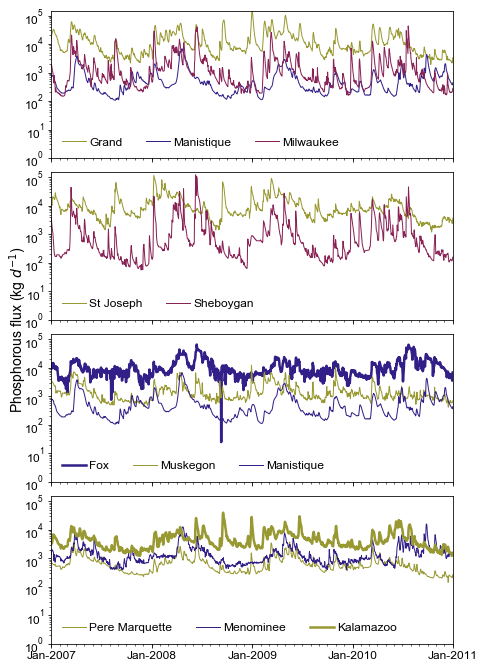

In [19]:
### ==============================================================
### Define grids
### ==============================================================
fig = plt.figure(figsize=(7.2, 7.2*1.618))
grid = AxesGrid(fig, 111, 
                share_all=False,
                nrows_ncols = (4, 1),
                axes_pad = 0.2,
                aspect=False,
                label_mode = 'L')  # note the empty label_mode


### ==============================================================
### Define river groups
### ==============================================================
group1 = ['Grand', 'Milwaukee', 'Manistique']
group2 =['Sheboygan', 'St Joseph' ]
group3 =['Fox', 'Muskegon', 'Manistique']
group4 =['Kalamazoo', 'Menominee', 'Pere Marquette']

### ==============================================================
### Converions
### ==============================================================
L_in_m3 = 10000
kg_in_mg = 1 / 1000000
s_in_day = 86400

### ==============================================================
### Variables
### ==============================================================
startYear = 2007
ymin = 10**0
ymax = 10**5 + 5*10**4

for i, siteID in enumerate(stations.keys()):
    ### Get the river name
    riverName = stations[siteID][3]
    color = stations[siteID][4]
    linestyle = stations[siteID][5]
    linewidth = stations[siteID][6]
    
    ### ==============================================================
    ### Plot group 1
    ### ==============================================================
    if riverName in group1:
        ### Get dataframe
        ax_ind = 0
        df = pd.read_csv(stations[siteID][0], index_col='Date')
        df.index = df.index.astype('datetime64[ns]')
        mask = (df.index>= str(startYear) + '-01-01') & \
               (df.index<=str(startYear+4) + '-01-01')
        df = df[mask]
        
        ### Calculate flux (mg / s) converted to kg/day
        df['flux'] = (df['Q'] * L_in_m3) * df['TP']
        df['flux'] = df['flux'] * s_in_day * kg_in_mg

        ### Plot data
        grid[ax_ind].plot(df['flux'] ,
                         label=riverName, 
                         color=color, 
                         linestyle=linestyle,
                         linewidth=linewidth)
        ### Legend
        grid[ax_ind].legend(loc='lower left', #bbox_to_anchor=(1.25, 1), 
                          frameon=False, 
                          fontsize=12,  
                          labelspacing=1,
                          handletextpad=0.25,
                          ncol=len(group1))
    ### ==============================================================
    ### Plot group 2
    ### ============================================================== 
    if riverName in group2:
        ### Get dataframe
        ax_ind = 1
        df = pd.read_csv(stations[siteID][0], index_col='Date')
        df.index = df.index.astype('datetime64[ns]')
        mask = (df.index>= str(startYear) + '-01-01') & \
               (df.index<=str(startYear+4) + '-01-01')
        df = df[mask]
        
        ### Calculate flux (mg / s) converted to kg/day
        df['flux'] = (df['Q'] * L_in_m3) * df['TP']
        df['flux'] = df['flux'] * s_in_day * kg_in_mg

        ### Plot data
        grid[ax_ind].plot(df['flux'] ,
                         label=riverName, 
                         color=color, 
                         linestyle=linestyle,
                         linewidth=linewidth)
        ### Legend
        grid[ax_ind].legend(loc='lower left', #bbox_to_anchor=(1.25, 1), 
                          frameon=False, 
                          fontsize=12,  
                          labelspacing=1,
                          handletextpad=0.25,
                          ncol=len(group2))
    ### ==============================================================
    ### Plot group 3
    ### ==============================================================
    if riverName in group3:
        ### Get dataframe
        ax_ind = 2
        df = pd.read_csv(stations[siteID][0], index_col='Date')
        df.index = df.index.astype('datetime64[ns]')
        mask = (df.index>= str(startYear) + '-01-01') & \
               (df.index<=str(startYear+4) + '-01-01')
        df = df[mask]
        
        ### Calculate flux (mg / s) converted to kg/day
        df['flux'] = (df['Q'] * L_in_m3) * df['TP']
        df['flux'] = df['flux'] * s_in_day * kg_in_mg
        
        ### Plot data
        grid[ax_ind].plot(df['flux'] , 
                         label=riverName, 
                         color=color, 
                         linestyle=linestyle,
                         linewidth=linewidth)
        
        ### Legend
        grid[ax_ind].legend(loc='lower left', #bbox_to_anchor=(1.25, 1), 
                          frameon=False, 
                          fontsize=12,  
                          labelspacing=1,
                          handletextpad=0.25,
                          ncol=len(group3))
    ### ==============================================================
    ### Plot group 4
    ### ==============================================================     
    if riverName in group4:
        ### Get dataframe
        ax_ind = 3
        df = pd.read_csv(stations[siteID][0], index_col='Date')
        df.index = df.index.astype('datetime64[ns]')
        mask = (df.index>= str(startYear) + '-01-01') & \
                              (df.index<=str(startYear+4) + '-01-01')
        df = df[mask]
        
        ### Calculate flux (mg / s) converted to kg/day
        df['flux'] = (df['Q'] * L_in_m3) * df['TP']
        df['flux'] = df['flux'] * s_in_day * kg_in_mg
        
        ### Plot 
        grid[ax_ind].plot( df['flux'] , 
                         label=riverName, 
                         color=color, 
                         linestyle=linestyle,
                         linewidth=linewidth)
        
        ### Legend
        grid[ax_ind].legend(loc='lower left', #bbox_to_anchor=(1.25, 1), 
                          frameon=False, 
                          fontsize=12,  
                          labelspacing=1,
                          handletextpad=0.25,
                          ncol=len(group4))

for ax in grid:
        # Yticks
        ax.set_ylim(ymin, ymax)
        ax.set_yscale('log')
        
        # Xticks
        ax.set_xlim(df.index[0], pd.Timestamp('2011-01-01 00:00:00'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
        ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

### ==============================================================
### Common y label
### ==============================================================
ylabel = r'Phosphorous flux (kg $d^{-1}$)'
fig.text(0.04, 0.5, ylabel, 
         va='center', 
         rotation='vertical',
         fontsize=14)